# Дз 4

## Easy

In [327]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [340]:
data_bmw = pd.read_csv('../data/cars/bmw.csv')
data_bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [341]:
data_bmw = data_bmw.drop(columns=['model', 'transmission', 'fuelType'])
data_bmw.head()

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125,57.6,2.0
1,2018,27000,14827,145,42.8,2.0
2,2016,16000,62794,160,51.4,3.0
3,2017,12750,26676,145,72.4,1.5
4,2014,14500,39554,160,50.4,3.0


In [345]:
X = data_bmw.drop('price', axis=1)
y = data_bmw['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("r2 score:", r2_score(y_test, y_pred))

r2 score: 0.8674485041696555


In [332]:
feature_importance = model.feature_importances_
feature_importance_dict = pd.DataFrame(zip(X.columns, feature_importance))
feature_importance_dict

,0,1
0,year,0.452038
1,mileage,0.106150
2,tax,0.019261
3,mpg,0.154018
4,engineSize,0.268532


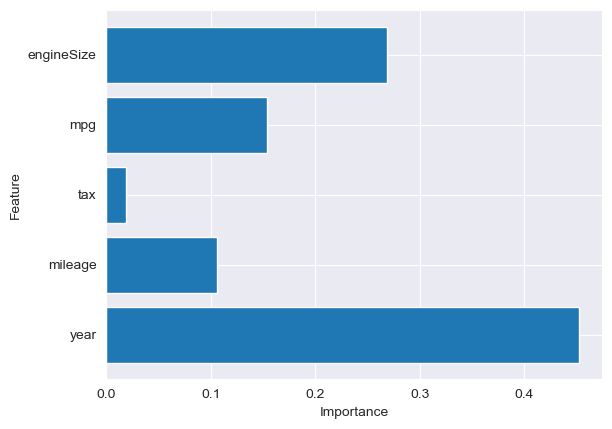

In [333]:
plt.barh(range(len(feature_importance)), feature_importance)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Выводы:
Наибольшую значимость для модели имеет признак `year`, чуть меньшую - `engine size`. Остальные признаки `mpg`, `mileage`, `tax` менее значительны 

## Medium

In [310]:
all_cars_df = pd.DataFrame()
data_folder = '../data/cars'
files = os.listdir(data_folder)

for file in files:
    file_path = os.path.join(data_folder, file)
    df = pd.read_csv(file_path)
    all_cars_df = pd.concat([all_cars_df, df], ignore_index=True)
all_cars_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN


In [311]:
all_cars_df = all_cars_df.drop('model', axis=1) #данные о модели машины нужны только внутри одной марки
#вместо удаления можно было бы проиндексировать все уникальные модели
all_cars_encoded = pd.get_dummies(all_cars_df, columns=['fuelType', 'transmission'], dtype=int)
all_cars_encoded.head()

,year,price,mileage,tax,mpg,engineSize,tax(£),fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,2017,12500,15735,150.0,55.4,1.4,NaN,0,0,0,0,1,0,1,0,0
1,2016,16500,36203,20.0,64.2,2.0,NaN,1,0,0,0,0,1,0,0,0
2,2016,11000,29946,30.0,55.4,1.4,NaN,0,0,0,0,1,0,1,0,0
3,2017,16800,25952,145.0,67.3,2.0,NaN,1,0,0,0,0,1,0,0,0
4,2019,17300,1998,145.0,49.6,1.0,NaN,0,0,0,0,1,0,1,0,0


In [312]:
X = all_cars_encoded.drop('price', axis=1)
y = all_cars_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Decision tree

In [317]:
param_dt = {
    'max_depth': [5, 10, 15, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 8, 10]
}

model_dt = GridSearchCV(DecisionTreeRegressor(), param_dt, cv=5)
model_dt.fit(X_train, y_train)
print(f"Best parameters for decision tree: {model_dt.best_params_}")

Best parameters for decision tree: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 10}


In [318]:
model_dt.best_estimator_.fit(X_train, y_train)
pred_dt = model_dt.best_estimator_.predict(X_test)
print(f'r2 score для Decision Tree: {r2_score(y_test, pred_dt)}')

r2 score для Decision Tree: 0.45610533912884466


### Random forest

In [296]:
X = all_cars_encoded.drop('price', axis=1)
y = all_cars_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [297]:
%%time
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
model_rf = GridSearchCV(RandomForestRegressor(), param_rf, cv=5)
model_rf.fit(X_train, y_train)

print(f"Best parameters for random forest: {model_rf.best_params_}")

Best parameters for random forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
CPU times: total: 1h 7min 20s
Wall time: 1h 7min 27s


In [298]:
pred_rf = model_rf.best_estimator_.predict(X_test)
print(f'r2 score для random forest: {r2_score(y_test, pred_rf)}')

r2 score для random forest: 0.9233136650295353


### Выводы:
Desicion tree работает намного быстрее и выдает средние результаты.
 
Random forest работает намного дольше на всех данных, но дает точные результаты.